In [2]:
import hanspell

In [1]:
import os
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

# from konlpy.tag import Kkma

# sys.path.append('..')

# from Code.config import *
# from Code.preprocessingSentence import *

### 문제 List
* preprocessingentence 함수는 input sentence의 길이가 일정 수준 이상인 경우, null 값 return
    
    ```python 
    preprocessingSentence(df['content'].iloc[9], kkma)
    ```

In [4]:
path = '../Data/Raw/탈모톡톡_19~23세탈모.csv'
df = pd.read_csv(path)

In [5]:
df.head(2)

,title,category,date,writer,rank,view,href,content,imageList
0,22인데 이게 맞냐,[22세탈모],08월 08일,모자람있는사람,4,조회 409,https://daedamo.com/1923club/126082?overlaps=1,<ㅜㅠㅜ>곧있으면 전역하는 짬찌인데 말출나와서 오랜만에 정수리 사진 찍으니깐 입대 ...,['https://daedamo.com/new/data/file/1923club/6...
1,20살 탈모,[20세탈모],08월 13일,K29614872442308…,4,조회 212,https://daedamo.com/1923club/126108?overlaps=1,재수하면서 이렇게 됐는데 다시 회복 가능한가요ㅠㅠ 스트레스받아서 너무 힘들어요\r지...,['https://daedamo.com/new/data/file/1923club/4...


In [ ]:
kkma = Kkma()
result = df.iloc[:10].apply(lambda x : preprocessingSentence(x['title'] + x['content'], kkma), axis = 1)

### 오늘의 할 일
* multi-processing
    * multi-processing 함수 파라미터 제공
    * multi-processing 함수 jupyter notebook 실행
* save 함수 생성
* 감정분석 :  preprocessingSentence.py: sentimentAnalysis 선언
* LDA 
    * 주요기능
        * TF-IDF는 적정 크기의 키워드 수 선택이 필요한 경우 사용(https://wikidocs.net/40710)
        * LDA 실행 함수(https://wikidocs.net/30708)
            * input
                * Corpus:
                * Num_topics:
                * Id2word:
                * Passes:
            * output
        * LDA 시각화 함수
            * pyLDAvis.gensim_models
            * parameters
                * ldaModel: 
                * Corpus:
                * Dictionary: 
        * LDA 주요 키워드 도출 함수
        * 토픽별 추세 분석 함수
        * 토픽별 Pain-Point 분석
    * 작동 특징
        * ldaAnalysis
        * document별 토픽 category 저장
        * config.py 생성: parameter 관리
* generalAnalysis
    * 주요기능
        * 전체 분석
            * 전체 비율 
            * 전체 Trend(시계열)
                * 게시글 수
                * 작성자 수
        * 특정 column별 분석
            * column별 비율
            * column별 Trend(시계열)
                * 게시글 수
                * 작성자 수

In [11]:

df = pd.read_excel('../Data/Preprocessed/탈모톡톡_19~23세탈모.xlsx')

In [12]:
df.loc[df['date'] == '2016년 02-29', 'date'] = '2016-02-28'
df.loc[df['date'] == '2020년 02-29', 'date'] = '2020-02-28'

In [13]:
df.to_excel('../Data/Preprocessed/탈모톡톡_19~23세탈모.xlsx', index = False)

In [14]:
df['date'] = df['date'].apply(lambda x : pd.to_datetime(x))
df.set_index('date', inplace = True)

In [33]:
tmp = df.groupby(['propTopic']).resample('Y')['href'].nunique().reset_index()

In [34]:
tmp

,propTopic,date,href
0,0,2013-12-31,10
1,0,2014-12-31,470
2,0,2015-12-31,411
3,0,2016-12-31,361
4,0,2017-12-31,419
...,...,...,...
115,10,2019-12-31,101
116,10,2020-12-31,73
117,10,2021-12-31,89
118,10,2022-12-31,124


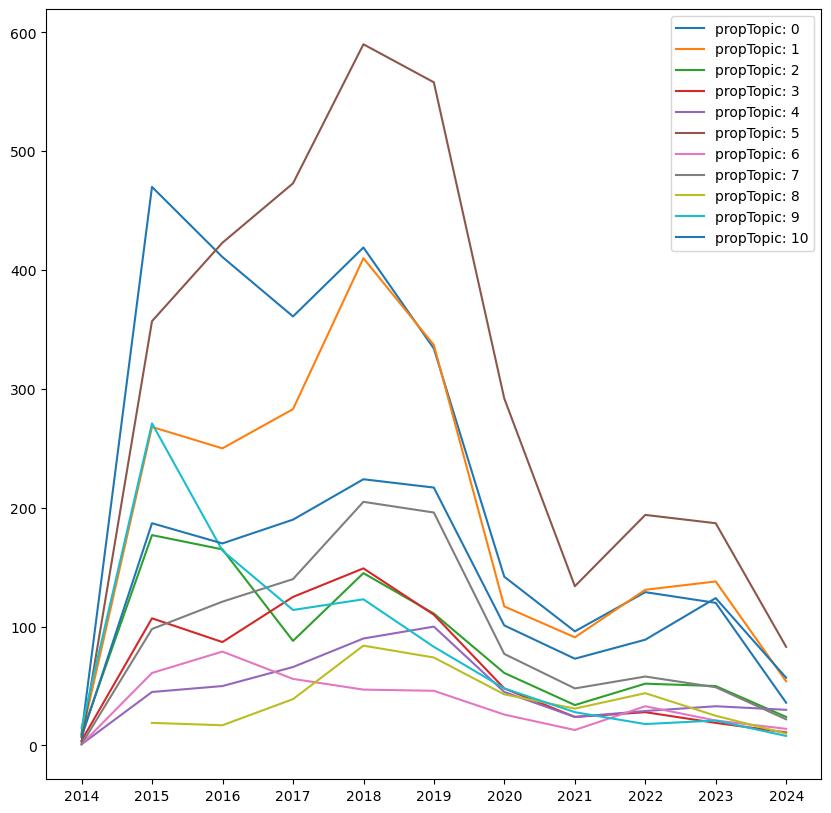

In [35]:
fig, ax = plt.subplots(figsize = (10, 10))

for propTopic in sorted(tmp['propTopic'].unique()):
    tmp_df = tmp[tmp['propTopic'] == propTopic]

    ax.plot(tmp_df['date'], tmp_df['href'], label = f'propTopic: {propTopic}')
    ax.legend()

In [9]:
df = pd.read_excel('../Data/Preprocessed/탈모톡톡_탈모수다.xlsx')

In [10]:
df.head(2)

,title,date,writer,rank,category,content,imageList,view,href,titleContent,preprocessedSentence,keyword,sentimentResult
0,거나 말거나..,2002-03-15 15:38:00,권한상,NaN,NaN,옛날 저희 집 옆에 한의사 한 분이 살고 계셨습니다.\n그 분 집은 원래는 평범한 ...,NaN,793,https://daedamo.com/story/92488?page=1033&over...,거나 말거나.. 옛날 저희 집 옆에 한의사 한 분이 살고 계셨습니다.\n그 분 집은...,거나 말거나.. 옛날 저희 집 옆에 한의사 한 분이 살고 계셨습니다.. 그분 집은 ...,"['걸다', '날', '집', '옆', '한의사', '살다', '집', '원래', ...",NaN
1,e: 조라 열받네요/.,2002-03-16 13:32:00,인내맨,NaN,NaN,조라.........\n열받는다.\n\n\n권한상 wrote:\n> 옛날 저희 집 ...,NaN,743,https://daedamo.com/story/92529?page=1033&over...,e: 조라 열받네요/. 조라.........\n열받는다.\n\n\n권한상 wrote...,e 조라 열받네요. 조라.......... 열받는다.... 권하다 상 wrote. ...,"['조라', '열받다', '조라', '열받다', '권하다', '상', '옛날', '...",NaN


In [26]:
df = pd.read_excel('../Data/Preprocessed/샴푸&두피케어_샴푸&영양제.xlsx')

In [27]:
df.head(2)

,title,category,date,writer,rank,view,href,content,imageList,titleContent,preprocessedSentence,keyword,sentimentResult,propTopic,propTopicRatio,topicsRatio,cluster
0,댕기머리 4년째 사용 중입니다.,[탈모샴푸&토닉],2013-01-01,지투,5,조회 1205,https://daedamo.com/balmo/28438?page=113&overl...,"저는 댕기머리만을 4년째 쓰고 있는 데, 제품은 예전에는 기골드를, 현재는 진기를 ...",[],"댕기머리 4년째 사용 중입니다. 저는 댕기머리만을 4년째 쓰고 있는 데, 제품은 예...",댕기머리 4년째 사용 중입니다. 저는 댕기머리만을 4년째 쓰고 있는 데 제품은 예전...,"['댕기', '머리', '년', '사용', '댕기', '머리', '년', '쓰다',...",NaN,3,0.6424,"[(1, 0.34510082), (3, 0.6423908)]",2
1,"탈모예방 - 머리 감는 법,샴푸 고르는 법",[탈모샴푸&토닉],2013-01-01,멋진후니,2,조회 1840,https://daedamo.com/balmo/28457?page=113&overl...,요즘 머리가 빠지고 그래서 알아봤더니... 두피관리가 중요하다고 하는데 그중에서 ...,[],"탈모예방 - 머리 감는 법,샴푸 고르는 법 요즘 머리가 빠지고 그래서 알아봤더니....",탈모예방 머리 감는 법 샴푸 고르는 법 요즘 머리가 빠지고 그래서 알아봤더니.....,"['탈모', '예방', '머리', '감다', '법', '샴푸', '고르다', '법'...",NaN,4,0.4490,"[(1, 0.025741605), (2, 0.014991964), (3, 0.442...",1


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df

,title,category,date,writer,rank,view,href,content,imageList,titleContent,preprocessedSentence,keyword,sentimentResult,propTopic,propTopicRatio,topicsRatio,cluster
0,댕기머리 4년째 사용 중입니다.,[탈모샴푸&토닉],2013-01-01,지투,5,조회 1205,https://daedamo.com/balmo/28438?page=113&overl...,"저는 댕기머리만을 4년째 쓰고 있는 데, 제품은 예전에는 기골드를, 현재는 진기를 ...",[],"댕기머리 4년째 사용 중입니다. 저는 댕기머리만을 4년째 쓰고 있는 데, 제품은 예...",댕기머리 4년째 사용 중입니다. 저는 댕기머리만을 4년째 쓰고 있는 데 제품은 예전...,"['댕기', '머리', '년', '사용', '댕기', '머리', '년', '쓰다',...",NaN,3,0.6424,"[(1, 0.34510082), (3, 0.6423908)]",2
1,"탈모예방 - 머리 감는 법,샴푸 고르는 법",[탈모샴푸&토닉],2013-01-01,멋진후니,2,조회 1840,https://daedamo.com/balmo/28457?page=113&overl...,요즘 머리가 빠지고 그래서 알아봤더니... 두피관리가 중요하다고 하는데 그중에서 ...,[],"탈모예방 - 머리 감는 법,샴푸 고르는 법 요즘 머리가 빠지고 그래서 알아봤더니....",탈모예방 머리 감는 법 샴푸 고르는 법 요즘 머리가 빠지고 그래서 알아봤더니.....,"['탈모', '예방', '머리', '감다', '법', '샴푸', '고르다', '법'...",NaN,4,0.4490,"[(1, 0.025741605), (2, 0.014991964), (3, 0.442...",1
2,혹시 녹차실감 인터넷 구매 해보신분?,[탈모샴푸&토닉],2013-10-03,kunyjs,6,조회 2389,https://daedamo.com/balmo/27145?page=120&overl...,녹차실감을 살까 고민중인데.. 좋다는 소리가 있어서.. 샴푸는 샴푸일뿐이라고 하는...,[],혹시 녹차실감 인터넷 구매 해보신분? 녹차실감을 살까 고민중인데.. 좋다는 소리가 ...,혹시 녹차 실감 인터넷 구매해 보신 분? 녹차 실감을 살까 고민 중인데.. 좋다는 ...,"['녹차', '실감', '인터넷', '구매', '보신', '분', '녹차', '실감...",NaN,1,0.9465,"[(1, 0.9465228), (5, 0.036678337)]",0
3,리엔 탈모라인 사용 중이에요.,[탈모샴푸&토닉],2013-10-03,대머리싫다,4,조회 1314,https://daedamo.com/balmo/27154?page=120&overl...,려 사용하다 리엔 탈모 라인으로 바꾸었는데 딱히 일반 샴푸와 다른 점은 크게 못 ...,[],리엔 탈모라인 사용 중이에요. 려 사용하다 리엔 탈모 라인으로 바꾸었는데 딱히 일...,리엔 탈모 라인 사용 중이에요. 려 사용하다 리엔 탈모 라인으로 바꾸었는데 딱히 ...,"['리', '탈모', '라인', '사용', '사용', '리', '탈모', '라인',...",NaN,3,0.6311,"[(1, 0.11423021), (3, 0.63111264), (4, 0.24102...",0
4,발모차 먹고 있습니다..,[한약초&환],2013-10-03,kunyjs,6,조회 3998,https://daedamo.com/balmo/27133?page=120&overl...,고민 하다가... 지푸라기 잡는 심정으로... 쩝... 인터넷 뒤지다가.. 제기동쪽...,[],발모차 먹고 있습니다.. 고민 하다가... 지푸라기 잡는 심정으로... 쩝... 인...,발모 차 먹고 있습니다.. 고민하다가... 지푸라기 잡는 심정으로... 쩝... 인...,"['발모', '차', '먹다', '고민', '지푸라기', '잡다', '심정', '인...",NaN,5,0.6560,"[(1, 0.33532086), (5, 0.656043)]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,내일 모발이식 받는데,[영양제&비타민],2023-08-08,챠니파파,5,조회 236,https://daedamo.com/balmo/67186?overlaps=1,영양제도 따로 챙겨 먹어야 할까요? 관리 제대로 하고 싶어서 이것 저것 욕심나네요.,[],내일 모발이식 받는데 영양제도 따로 챙겨 먹어야 할까요? 관리 제대로 하고 싶어서 ...,내일 모발이식받는데 영양제도 따로 챙겨 먹어야 할까요? 관리 제대로 하고 싶어서 이...,"['내일', '모발', '이식', '받다', '영양', '제도', '챙기다', '먹...",NaN,5,0.5227,"[(0, 0.011160794), (1, 0.011193367), (2, 0.011...",0
4883,모발이식이후샴푸,[탈모샴푸&토닉],2023-08-09,MZ3대,5,조회 252,https://daedamo.com/balmo/67189?overlaps=1,모발이식 이후에도 샴푸 탈모 샴푸 많이쓰시나요?,[],모발이식이후샴푸 모발이식 이후에도 샴푸 탈모 샴푸 많이쓰시나요?,모발이식 이후 샴푸 모발이식 이후에도 샴푸 탈모 샴푸 많이 쓰시나요?,"['모발', '이식', '이후', '샴푸', '모발', '이식', '이후', '샴푸...",NaN,2,0.9296,"[(0, 0.013911077), (1, 0.014187706), (2, 0.929...",3
4884,탈모 샴푸 효과?,[탈모샴푸&토닉],2023-08-09,여기에,32,조회 445,https://daedamo.com/balmo/67192?overlaps=1,탈모 샴푸 효과가 있는지 의문 입니다. 유지라도 해주면 좋으련만... 사용하시는 분...,[],탈모 샴푸 효과? 탈모 샴푸 효과가 있는지 의문 입니다. 유지라도 해주면 좋으련만....,탈모 샴푸 효과? 탈모 샴푸 효과가 있는지 의문입니다. 유지라도 해주면 좋으련만.....,"['탈모', '샴푸', '효과', '탈모', '샴푸', '효과', '있다', '의문...",NaN,1,0.9506,"[(1, 0.9505943)]",0
4885,비타민B 좋은가요?,[영양제&비타민],2023-08-11,정상호,10,조회 224,https://daedamo.com/balmo/67201?overlaps=1,탈모에 비타민B가 좋다고 들었는데 저는 그냥 평소에 멀티비타민만 먹고 있거든요. ...,[],비타민B 좋은가요? 탈모에 비타민B가 좋다고 들었는데 저는 그냥 평소에 멀티비타민...,비타민B 좋은가요? 탈모에 비타민B가 좋다고 들었는데 저는 그냥 평소에 멀티비타민...,"['비타민', '좋', '탈모', '비타민', '좋', '듣다', '평소', '멀티...",NaN,5,0.6299,"[(2, 0.11153621), (3, 0.1326571), (4, 0.114684...",4


In [25]:
# df.to_excel('../Data/Preprocessed/샴푸&두피케어_샴푸&영양제.xlsx',
            # index = False)